In [197]:
# Importing necessary packages and functions required
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [198]:
# Reading the dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
df = pd.read_csv(url, header=None, na_values=['?'])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [199]:
df[127].describe()

count    1994.000000
mean        0.237979
std         0.232985
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: 127, dtype: float64

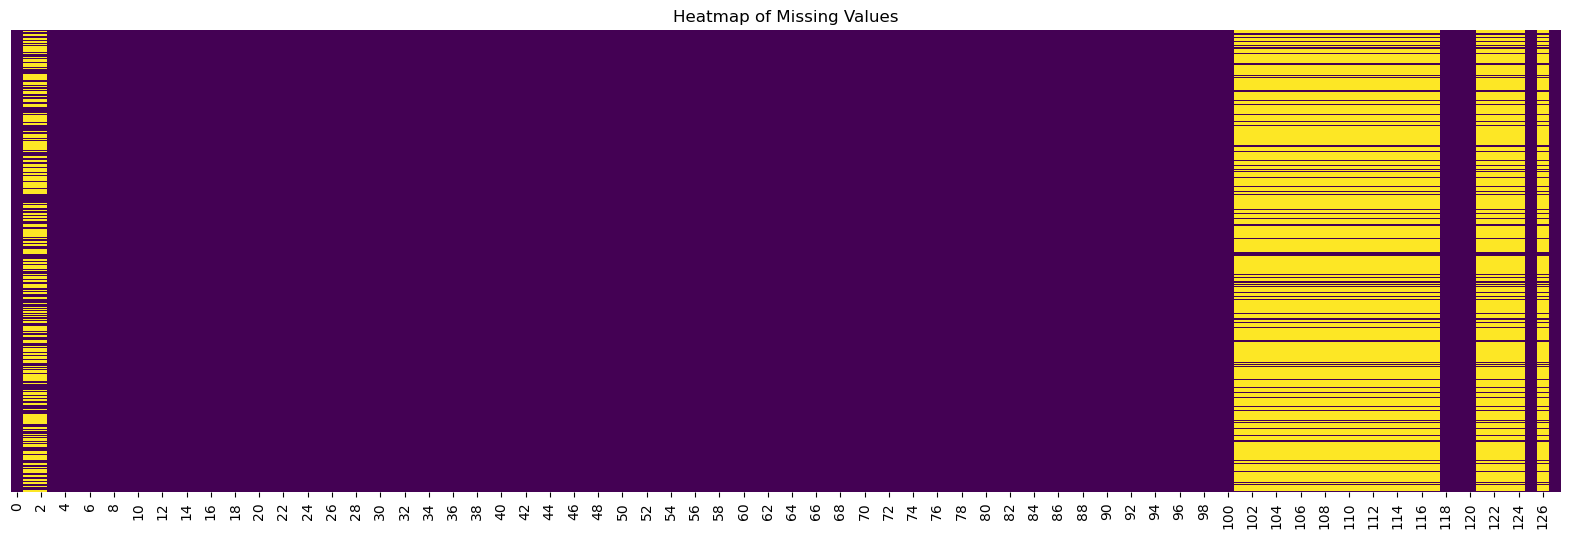

In [200]:
# Ensure 'crime' is a valid DataFrame
plt.figure(figsize=(20, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")  # Optional: Add a title for better readability
plt.show()


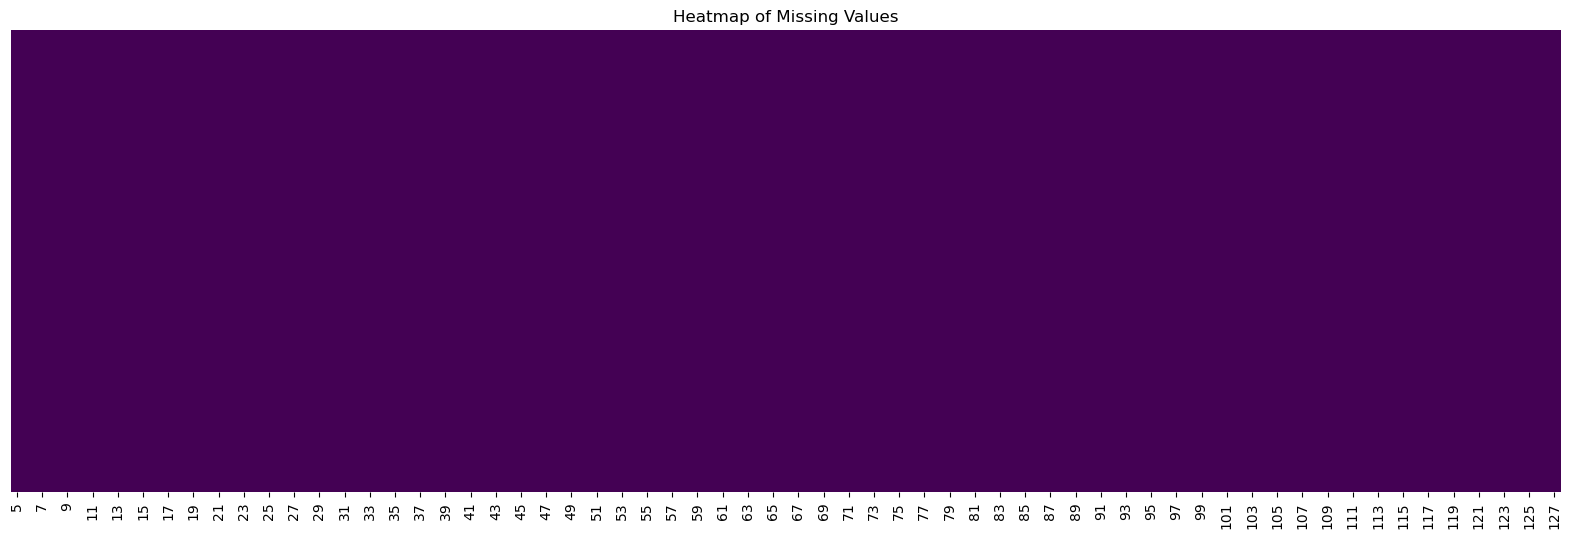

In [201]:
# Drop columns by index
df.drop(df.columns[[0, 1, 2, 3, 4]], axis=1, inplace=True)

# Remove rows with missing values
df.dropna(inplace=True)

# Plot missing values heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")  # Add a title for clarity
plt.show()

In [202]:
# defining X and y
X = df.drop(127, axis=1)
y = df[127]

In [203]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=1)

In [204]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Standardization the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Build and train the linear regression model
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

# Print the intercept and coefficients
print("Intercept:", linreg.intercept_)
print("Coefficients:", linreg.coef_)


Intercept: 0.44829596412555944
Coefficients: [-1.00010644e+00  1.05806217e-01 -8.93598546e-02 -7.62922007e-02
 -4.67278813e-02  7.21644956e-02 -1.83832066e-01 -5.86841031e-02
  1.62317226e-01 -8.18951228e-02  1.16400963e+00 -1.10799149e-02
  1.64887559e-01  2.13099697e-02 -3.19897880e-02 -1.78752800e-01
  7.97589578e-02  1.72602748e-01 -1.15162564e-02  1.37209267e-01
 -3.45234382e-02 -5.61789154e-02 -4.82049801e-02  1.23104034e-02
 -2.62358557e-02  2.38214542e-02 -2.10760916e-02 -2.68196469e-01
  2.97805357e-01  3.60745541e-02 -2.05351263e-01 -1.99984703e-03
  2.36540142e-02  2.20414028e-02 -2.96158518e-02 -5.74264626e-03
  3.44522340e-02  6.86617773e-02  3.67753511e-01 -9.06731322e-02
  3.81212250e-01 -8.39741140e-01  1.41510133e-01 -2.35504665e-01
 -2.40887100e-01  2.49037547e-01  4.68771279e-02 -8.64592720e-02
  9.10037863e-02  1.96515606e-02  2.97272799e-02 -5.09265426e-02
  7.96073082e-02 -1.29133501e-01 -4.99539218e-02  1.00800544e-01
 -1.61402600e-01  1.81670303e-01  8.16937907e

In [247]:
y_pred = linreg.predict(X_test)

# calculate R^2 value, MAE, MSE, RMSE

from sklearn.metrics import r2_score
from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.2128877943719596
mean_absolute_error : 0.17919286380593577
mean_squared_error :  0.04887959110307497
root_mean_squared_error :  0.22108729294800045


## Ridge regression

### alpha: must be positive, increase for more regularization
### normalize: scales the features


In [263]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Ridge regression with alpha=0 (equivalent to linear regression)
ridgereg = Ridge(alpha=0)
ridgereg.fit(X_train_scaled, y_train)

# Predictions
y_pred = ridgereg.predict(X_test_scaled)

# Metrics
print("R-Square Value:", r2_score(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))


R-Square Value: 0.19704456296241124
Mean Absolute Error (MAE): 0.16725155824738916
Mean Squared Error (MSE): 0.04986345422641736
Root Mean Squared Error (RMSE): 0.22330126337846223


In [265]:
# Ridge regression with alpha=0.1
ridgereg = Ridge(alpha=0.1)
ridgereg.fit(X_train_scaled, y_train)

# Predictions
y_pred = ridgereg.predict(X_test_scaled)

# Metrics
print("R-Square Value:", r2_score(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))


R-Square Value: 0.3664694687430935
Mean Absolute Error (MAE): 0.14533707026799375
Mean Squared Error (MSE): 0.039342184122837943
Root Mean Squared Error (RMSE): 0.1983486428560527


In [209]:
# examing the coefficients
print(ridgereg.coef_)

[-0.10916452  0.08785078 -0.08329798 -0.03665645 -0.03808354  0.05063364
 -0.13859605 -0.07267932  0.13874334 -0.03149568  0.23767084 -0.00461068
  0.12526827 -0.00123804 -0.0212966  -0.17062029  0.02796928  0.13727881
  0.0207292   0.12995294 -0.09254854  0.00202947 -0.04073595  0.01248594
 -0.0210065   0.02511689 -0.02186726 -0.26168024  0.25216245  0.00925239
 -0.16428715  0.02434362  0.04469311  0.05481651 -0.0345352  -0.00079735
  0.05703164  0.03909694  0.14714154 -0.05949492  0.06256558 -0.31401184
  0.15151636 -0.18138148 -0.21363822  0.19477597  0.01748839 -0.07745675
  0.08774536  0.03418459  0.03983404 -0.04835797  0.0546479  -0.12448612
  0.04706694  0.02285602 -0.06468708  0.15699952  0.18063053 -0.40852121
  0.09260118  0.05130317  0.06179602 -0.19520933 -0.15238137  0.05436945
 -0.10943682 -0.13962426  0.1033321   0.08923952  0.01494583  0.05428371
  0.0295699   0.20792388 -0.01413142  0.01946773 -0.00061305  0.00941878
 -0.03652397 -0.0480936  -0.089128    0.04320848 -0

### RidgeCV: ridge regression with built-in cross-validation of the alpha parameter
### alphas: array of alpha values to try



In [326]:
from sklearn.linear_model import RidgeCV
import numpy as np

# Create an array of alpha values
alpha_range = 10.**np.arange(-2, 3)

# Select the best alpha with RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train_scaled, y_train)

# Output the best alpha
print("Best Alpha:", ridgeregcv.alpha_)


Best Alpha: 100.0


In [328]:
# Predict with the best alpha
y_pred = ridgeregcv.predict(X_test_scaled)

# Calculate and print metrics
print("R-Square Value:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R-Square Value: 0.5316842176635033
MAE: 0.1313726961794042
MSE: 0.02908236434913333
RMSE: 0.17053552225015564


## Lasso regression

### alpha: must be positive, increase for more regularization
### normalize: scales the features (without using StandardScaler)

In [361]:
from sklearn.linear_model import Lasso

# Fit Lasso regression with alpha=0.001
lassoreg = Lasso(alpha=0.001)
lassoreg.fit(X_train_scaled, y_train)

# Print coefficients
print(lassoreg.coef_)

[ 0.          0.         -0.         -0.         -0.          0.0323614
 -0.0024185  -0.00159518 -0.          0.01258359  0.00204342 -0.00376797
  0.         -0.00402334 -0.01789339 -0.11493484  0.          0.04944034
 -0.01002675  0.04386481 -0.         -0.         -0.01464064 -0.00791933
 -0.00155375  0.01795896  0.         -0.08148973  0.06121239 -0.00464941
 -0.08095269 -0.          0.03471424 -0.         -0.03480981  0.00153924
  0.03304836  0.          0.00293979  0.         -0.02950924 -0.
  0.02202487 -0.03236419 -0.04426933  0.         -0.         -0.02583622
  0.03975783 -0.          0.06198246 -0.01263587  0.         -0.03035216
  0.02613617  0.          0.          0.          0.         -0.
 -0.          0.01895321  0.         -0.          0.          0.
 -0.04946065  0.          0.          0.05588785  0.01191594  0.03057659
  0.02059612  0.03459026 -0.00209101  0.00697198 -0.          0.00232069
 -0.01634843 -0.01046993 -0.         -0.         -0.08373123  0.
  0.       

In [363]:
# Fit Lasso regression with alpha=0.01
lassoreg = Lasso(alpha=0.01)
lassoreg.fit(X_train_scaled, y_train)

# Print coefficients
print(lassoreg.coef_)

[-0.          0.          0.00347337 -0.04929377  0.          0.
  0.         -0.         -0.          0.         -0.          0.
 -0.         -0.         -0.00301213 -0.03342784  0.          0.
 -0.         -0.         -0.          0.         -0.         -0.00808078
  0.          0.          0.         -0.          0.00372806 -0.
 -0.         -0.          0.01508376 -0.0039117  -0.0150052   0.
  0.         -0.          0.01566387  0.          0.          0.
  0.         -0.02585759 -0.06493706 -0.         -0.         -0.
 -0.         -0.          0.00586865 -0.         -0.         -0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.00977382 -0.          0.
 -0.          0.          0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.00292779 -0.
 -0.         -0.          0.         -0.         -0.00548112  0.
  0.03493022  0. 

In [365]:
# Predict with Lasso model
y_pred = lassoreg.predict(X_test_scaled)

# Calculate and print the metrics
print("R-Square Value:", r2_score(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))

R-Square Value: 0.5432128956300385
Mean Absolute Error (MAE): 0.13270785267734278
Mean Squared Error (MSE): 0.028366434573258947
Root Mean Squared Error (RMSE): 0.16842337893908596


## alpha with LassoCV

In [370]:
# Select the best alpha with LassoCV
lassoregcv = LassoCV(n_alphas=100, random_state=1)
lassoregcv.fit(X_train_scaled, y_train)

# Print the best alpha
print('Best Alpha:', lassoregcv.alpha_)

Best Alpha: 0.02044475431464079


In [372]:
# examine the coefficients
print(lassoregcv.coef_)

[ 0.          0.          0.         -0.06956475  0.          0.
  0.         -0.          0.          0.          0.          0.
 -0.         -0.         -0.         -0.02213076  0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.          0.          0.02429616  0.
  0.         -0.          0.         -0.         -0.          0.
  0.         -0.          0.01750947  0.          0.          0.00253841
  0.         -0.02933285 -0.05853688 -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.          0.          0.
  0.         -0.          0.          0.00114585 -0.          0.
 -0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
  0.03726889  0. 

In [374]:
# Predict using the best alpha from LassoCV
y_pred = lassoregcv.predict(X_test_scaled)

# Calculate and print metrics
print("R-Square Value:", r2_score(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))

R-Square Value: 0.5498020508038363
Mean Absolute Error (MAE): 0.1336549645444036
Mean Squared Error (MSE): 0.02795724868043829
Root Mean Squared Error (RMSE): 0.16720421250805342


## Conclusion

### We learned two different types of regression techniques, namely Lasso and Ridge Regression which can be proved effective for overfitting. These techniques make a good fit model by adding a penalty and shrinking the beta coefficients. It is necessary to have a correct balance of the Bias and Variance to control overfitting.